## Escribiendo funciones

Escribir tus  propias funciones en `R`  permite al usuario combinar un conjunto de comandos de  `R` en una función fácil de llamar y  con capacidad de ser generalizable. Las funciones son fundamentales para `R`. Para poder convertirse en un usuario más avanzado o desarrollador de R, una buena comprensión de qué son las funciones y cómo escribirlas es crucial.

En términos generales, una función toma una o más entradas, las procesa para producir y devolver una salida. No todas las tareas de programación deben convertirse en una función. Sin embargo, siempre que un usuario se  encuentre copiando y pegando una línea particular de su código por tercera vez, probablemente debería escribir una función. Sabemos que el momento para escribir una función ha llegado, si es que el código que tenemos  es más de `100` líneas o menos. Largas líneas de código pueden llegar a ser casi imposibles de leer y entender. En su lugar, escribimos funciones con buenos nombres descriptivos que hacen que nuestro código sea más legible. Luego, en un adelanto separado, escribimos código usando estas  funciones.

La belleza de tal sistema es que se hace más fácil escribir código enfocado dentro de cada función que resuelve una parte particular de un problema. Otra ventaja de este enfoque es que, en caso de que se requiera una mayor eficiencia, es posible determinar qué funciones le están costando la mayor cantidad de procesamiento o tomar el tiempo más largo para completar. Entonces la investigación puede ser hecha en cómo ser más eficiente en  este punto.

Lo más importante para entender acerca de las funciones en  `R` es que las funciones son objetos por derecho propio. Se puede trabajar con funciones, exactamente de la misma manera que se trabaja con cualquier otro tipo de objeto. 


### Componentes de una función

Con algunas excepciones, la mayoría de las funciones en R tienen tres componentes:

* `formals`, lista de argumentos que controla cómo se puede llamar a la función.
* `body`,  el código dentro de la función.
* `environment`,  que determina la ubicación de las variables de la función.

In [1]:
f <- function(x, y = 5) {
x + y
}

La función acepta dos argumentos: `x` e `y`. El primer argumento, `x`, no tiene ningún valor predeterminado, pero el segundo argumento, `y`, por defecto es un valor de `5`. Aunque podemos verlos fácilmente (en parte porque hemos escrito la función), se pueden  examinar utilizando las funciones `formals()` y `args()`:

In [2]:
formals(f)

$x


$y
[1] 5


In [3]:
args(f)

function (x, y = 5) 
NULL

Para ver el código de R real o los comandos utilizados para procesar los argumentos, usamos la función `body()`:

In [4]:
body(f)

{
    x + y
}

El entorno de una función determina dónde busca variables u objetos, que pueden incluir tanto datos como funciones. Para ver el entorno de una función, utilizamos la función `environment()`:

In [5]:
environment(f)

<environment: R_GlobalEnv>

En este caso, la función está en el entorno `global`, donde creamos la función. Si no se muestra el entorno, significa que la función se creó en el entorno global. Para otras funciones, esto podría variar. Por ejemplo, si miramos el entorno para la función `install.packages()`, es el espacio de nombres para el paquete `utils`. 

In [6]:
environment(install.packages)

<environment: namespace:utils>

### Funciones primitivas

Como se mencionó, hay una excepción a la regla de que las funciones tienen tres componentes. Las funciones primitivas, como `sum()`, llaman al código C directamente con `.Primitive()` y no contienen código R. Por lo tanto las funciones `formals()`, `body()` y `environment()` son `NULL`:

In [7]:
sum

function (..., na.rm = FALSE)  .Primitive("sum")

In [8]:
formals(sum)

NULL

In [9]:
body(sum)

NULL

In [10]:
environment(sum)

NULL

Las funciones primitivas sólo se encuentran en el paquete `base` y  puesto que funcionan a un nivel bajo, pueden ser más eficientes y pueden tener reglas diferentes para las correspondencia  de argumentos (por ejemplo, `switch` y `call`). Esto, sin embargo, tiene un costo de comportarse diferente de todas las demás funciones en R. Por lo tanto, el equipo central de R por lo general evita crearlas a menos que no haya otra opción.

### Creando y llamando funciones

Para entender mejor las funciones, echemos un vistazo en que  consiste una función. Escribir el nombre de una función  muestra el código que se ejecuta cuando se llama. Esta es la función `rt`, que genera números aleatorios de una distribución t:


In [11]:
rt
##rt<- function (n, df, ncp)
##{
##  if (missing(ncp))
##    .External(C_rt, n, df)
## else rnorm(n, ncp)/sqrt(rchisq(n, df)/df)
##           }

function (n, df, ncp) 
{
    if (missing(ncp)) 
        .Call(C_rt, n, df)
    else if (is.na(ncp)) {
        warning("NAs produced")
        rep(NaN, n)
    }
    else rnorm(n, ncp)/sqrt(rchisq(n, df)/df)
}
<bytecode: 0x3c8d9e0>
<environment: namespace:stats>

Como se puede ver, `rt` toma hasta tres argumentos de entrada: `n` es el número de números aleatorios para generar, `df` es el número de grados de libertad, y `ncp` es una nocentralidad opcional. Para ser técnico, los tres argumentos `n`, `df` y `ncp` son los argumentos formales de `rt`. Cuando  se llama  a la función y le pasas valores, esos valores se llaman simplemente argumentos.

Entre las llaves, se pueden ver las líneas de código que constituyen el cuerpo de la función. Este es el código que se ejecuta cada vez que se llama a `rt`. Se observa que no hay una palabra clave explícita de "devolución" para indicar qué valor debe devolverse de la función. En `R`, el último valor que se calcula en la función se devuelve automáticamente. En el caso de `rt`, si se omite el argumento `ncp`, se invoca un código `C` para generar los números aleatorios, y éstos se devuelven. De lo contrario, la función llama a las funciones `rnorm`, `rchisq` y `sqrt` para generar los números y se devuelven.

In [12]:
formals(rt)

$n


$df


$ncp



In [13]:
environment(rt)

<environment: namespace:stats>

Para crear nuestras propias funciones, solo las asignamos como cualquier otra variable. A modo de ejemplo, vamos a crear una función para calcular la longitud de la hipotenusa de un triángulo rectángulo (para simplificar, usaremos el algoritmo obvio, para el código del mundo real, esto no funciona bien con números grandes y muy pequeños, por lo que no debe calcular la hipotenusa de esta manera):

In [14]:
hipotenusa <- function(x, y)
{
    sqrt(x ^ 2 + y ^ 2)
}

Ahora podemos llamar a esta función como lo haríamos con cualquier otra:

In [15]:
hipotenusa(3, 4)

[1] 5

In [16]:
hipotenusa(y = 24, x = 7)

[1] 25

Cuando llamamos a una función, si no nombramos los argumentos, entonces R los hará coincidir con la posición. En el caso de `hipotenusa(3, 4)`, `3` viene en primer lugar por lo que se asigna a `x`,  `4` viene segundo, por lo que se asigna a `y`.

Si queremos cambiar el orden en que pasamos los argumentos, o omitir algunos de ellos, entonces podemos pasar argumentos con nombre. En el caso de `hipotenusa(y = 24, x = 7)`, aunque pasamos las variables en el orden "erróneo", `R` todavía determina correctamente qué variable debe asignarse a `x`, y a `y`.

No tiene mucho sentido para una función de cálculo como `hipotenusa`, pero si quisiéramos, podríamos proporcionar valores por defecto para `x` e `y`. En esta nueva versión, si no pasamos nada a la función, `x` toma el valor `5` e `y` toma el valor de `12`:

In [17]:
hipotenusa <- function(x = 5, y = 12)
{
    sqrt(x ^ 2 + y ^ 2)
}
hipotenusa() #equivalente a hipotenusa(5, 12)

[1] 13

Ya hemos visto la función `formals` para recuperar los argumentos de una función como una lista (par). La función `args` hace lo mismo de una manera más legible por el usuario, pero menos programable. `formalArgs` devuelve un vector de caracteres de los nombres de los argumentos:

In [18]:
formals(hipotenusa)

$x
[1] 5

$y
[1] 12


In [19]:
args(hipotenusa)

function (x = 5, y = 12) 
NULL

In [20]:
formalArgs(hipotenusa)

[1] "x" "y"

El cuerpo de una función se recupera utilizando la función `body`. Esto no suele ser muy útil por sí solo, pero a veces queremos examinarlo como texto, para encontrar funciones que llaman a otra función, por ejemplo. Podemos usar `deparse` para lograr esto:

In [21]:
(cuerpo_de_funcion_hipotenusa <- body(hipotenusa))

{
    sqrt(x^2 + y^2)
}

In [22]:
help(deparse)

In [23]:
deparse(cuerpo_de_funcion_hipotenusa)

[1] "{"                   "    sqrt(x^2 + y^2)" "}"

Los valores predeterminados dados a argumentos formales de funciones pueden ser algo más que valores constantes - podemos pasar cualquier código de  R a ellos, e incluso usar otros argumentos formales. La siguiente función, `normaliza`, escala un vector. Los argumentos `m` y `s` son, por defecto, la media y la desviación estándar del primer argumento, de modo que el vector devuelto tendrá una  media de `0` y una desviación estándar de `1`:

In [24]:
normaliza <- function(x, m = mean(x), s = sd(x)){
    (x - m) / s
}
normalizado <- normaliza(c(1, 3, 6, 10, 15))

In [25]:
mean(normalizado)

[1] -5.572799e-18

In [26]:
sd(normalizado)

[1] 1

Hay un pequeño problema con nuestra función de normalización, ya que si alguno de los elementos de `x` son valores `NA`, no funcionaria:

In [27]:
normaliza(c(1, 3, 6, 10, NA))

[1] NA NA NA NA NA

Si hay elementos de un vector faltante, entonces por defecto, `mean` y `sd` devolverán `NA`. Por consiguiente, nuestra función `normaliza` devuelve valores de `NA` en todas partes. Podría ser preferible tener la opción de devolver solamente los valores de `NA` donde la entrada fue `NA`. 

Tanto `mean` como `sd` tienen un argumento, `na.rm`, que nos permite eliminar los valores faltantes antes de que se produzcan los cálculos. Para evitar todos los valores de `NA`, podríamos incluir tal argumento en `normalize`:

In [28]:
normaliza <- function(x, m = mean(x, na.rm = na.rm),
                      s = sd(x, na.rm = na.rm), na.rm = FALSE)
{
    (x - m) / s
}
normaliza(c(1, 3, 6, 10, NA))

[1] NA NA NA NA NA

In [29]:
normaliza(c(1, 3, 6, 10, NA), na.rm = TRUE)

[1] -1.0215078 -0.5107539  0.2553770  1.2768848         NA

Esto funciona, pero la sintaxis es un poco simple. Para ahorrarnos tener que escribir explícitamente los nombres de los argumentos que no son realmente utilizados por la función (na.rm sólo se pasa a  `mean` y `sd`), R tiene un argumento especial, `...` , que contiene todos los argumentos que no coinciden con la posición o el nombre:

In [30]:
normaliza <- function(x, m = mean(x, ...), s = sd(x, ...), ...)
{
    (x - m) / s
}
normaliza(c(1, 3, 6, 10, NA))

[1] NA NA NA NA NA

In [31]:
normaliza(c(1, 3, 6, 10, NA), na.rm = TRUE)

[1] -1.0215078 -0.5107539  0.2553770  1.2768848         NA

Ahora en la llamada a `normaliza(c (1, 3, 6, 10, NA), na.rm = TRUE)`, el argumento `na.rm` no coincide con ninguno de los argumentos formales de `normaliza`, ya que no es `x` o `m` o `s`. Eso significa que se almacena en el  argumento `...` de `normaliza`. Cuando evaluamos `m`, la  expresión `mean(x, ...)` es ahora `mean(x, na.rm = TRUE)`.

Si esto no está claro en este momento, no hay que preocuparse. Cómo funciona esto es un tema avanzado y la mayoría de las veces no tenemos que preocuparnos por ello. Por ahora, solo se necesita saber que  se puede usar  `...` para pasar argumentos a subfunciones.

### Pasar funciones desde y hacia otras funciones

Las funciones se pueden utilizar al igual que otros tipos de variables, por lo que podemos pasarlas como argumentos a otras funciones y devolverlas desde funciones. Un ejemplo común de una función que toma otra función como argumento es `do.call`. Esta función proporciona una sintaxis alternativa para llamar a otras funciones, permitiéndonos pasar los argumentos como una lista, en lugar de uno a la vez:

In [32]:
do.call(hipotenusa, list(x = 3, y = 4)) # como hipotenusa(3,4)

[1] 5

Supongamos que tenemos una lista de argumentos de función:

In [33]:
args <- list(1:10, na.rm = TRUE)

Para enviar esa lista a  `mean()`, se necesita `do.call()`:

In [34]:
do.call(mean, args)

[1] 5.5

In [35]:
# Equivalente a 

mean(1:10, na.rm = TRUE)

[1] 5.5

También podemos pasar funciones de forma anónima:

In [36]:
x_mas_y <- function(x, y) x + y
do.call(x_mas_y, list(1:5, 5:1))

[1] 6 6 6 6 6

In [37]:
# es lo mismo

do.call(function(x, y) x + y, list(1:5, 5:1))

[1] 6 6 6 6 6

Las funciones que devuelven funciones son más raras, pero no menos válidas. La función `ecdf` devuelve la función empírica de distribución acumulativa de un vector:

In [38]:
(emp_cum_dist_fn <- ecdf(rnorm(50)))

Empirical CDF 
Call: ecdf(rnorm(50))
 x[1:50] = -2.6049, -1.9331, -1.9316,  ..., 1.1871, 1.2417

In [39]:
is.function(emp_cum_dist_fn)

[1] TRUE

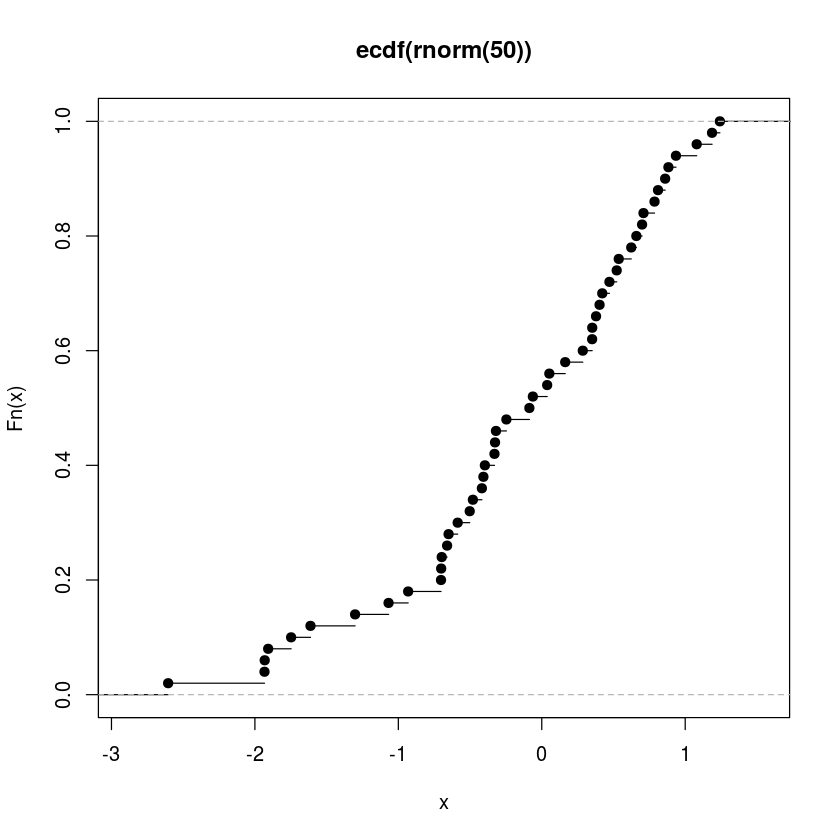

In [40]:
plot(emp_cum_dist_fn)

### Alcance de una  variable

El alcance de una variable es el conjunto de lugares desde donde se puede ver la variable. Por ejemplo, cuando se define una variable dentro de una función, el resto de las sentencias de esa función tendrán acceso a esa variable. En `R` (pero no en  `S`), las subfunciones también tendrán acceso a esa variable. En este ejemplo, la función `f` toma una variable `x` y la pasa a la función `g`. `f` también define una variable `y`, que está dentro del alcance de `g`, ya que `g` es una subfunción de `f`. Así, aunque `y` no está definido dentro de `g`, el ejemplo funciona:

In [41]:
f <- function(x)
{
    y <- 1
    g <- function(x)
    {
        (x + y) / 2 #y es usada, pero no es un argumento formal de  g
    }
    g(x)
} 
f(sqrt(5))  #¡Funciona! y se encuentra mágicamente en el entorno de f

[1] 1.618034

Si modificamos el ejemplo para definir `g` fuera de `f`, por lo que no es una subfunción de `f`, el ejemplo arrojará un error, ya que `R` no puede encontrar `y`:

In [42]:
f <- function(x)
{
    y <- 1
    g(x)
}
g <- function(x)
{
    (x + y) / 2
} 
f(sqrt(5))

ERROR: Error in x + y: argumento no-numérico para operador binario


Las funciones `get` y `exists` buscan variables tanto en entornos padres como en el entorno actual. El alcance  de variables funciona exactamente de la misma manera: `R` intentará encontrar variables en el entorno actual y, si no las encuentra, buscará en el entorno padre  y así sucesivamente hasta que llegue al  entorno global si fuese necesario. Las variables definidas en el entorno global se pueden ver desde cualquier lugar, por lo que se llaman variables globales.

En nuestro primer ejemplo, el entorno que pertenece a `f` es el entorno padre del entorno que pertenece a `g`, por lo que se puede encontrar `y`. En el segundo ejemplo, el entorno padre de `g` es el entorno global, que no contiene una variable `y`, por lo que se genera un error.

Este sistema de alcances, donde las variables pueden ser encontradas en los entornos de los padres a menudo es útil, pero también trae el potencial de daño y código horrible, inasequible. Considere la siguiente función, `h`:

In [43]:
h <- function(x)
{
    x * y
}

Parece que no debería funcionar, ya que acepta un único argumento, `x`, pero utiliza dos argumentos, `x` e `y` en su cuerpo. Vamos a intentarlo, con un espacio de trabajo limpio para el usuario:

In [44]:
h(9)

ERROR: Error in x * y: argumento no-numérico para operador binario


Hasta ahora, nuestra intuición se mantiene, `y` no está definido, por lo que la función produce un error. Ahora miremoos lo que sucede si definimos `y` en el espacio de trabajo del usuario:

In [45]:
y <- 16
h(9)

[1] 144

Cuando `R` no encuentra una variable denominada `y` en el entorno perteneciente a `h`, busca en el padre  de `h`: el espacio de trabajo del usuario (entorno global), donde se define `y`, por lo que  el producto se calcula correctamente.

Las variables globales deben utilizarse con moderación, ya que hacen que sea muy fácil escribir mal código. En esta función modificada `h2`, `y` se define aleatoriamente localmente la mitad de las veces. Con `y` definido en el espacio de trabajo del usuario, cuando  evaluamos `y` esta variable será aleatoriamente local o global!.

In [46]:
h2 <- function(x)
{
    if(runif(1) > 0.5) y <- 12
        x * y
}

Vamos a utilizar `replicate` para ejecutar el código varias veces para ver el resultado:

In [47]:
replicate(10, h2(9))

[1] 108 108 108 144 144 108 108 108 108 144

Cuando el número aleatorio uniforme (entre `0` y `1`) generado por `runif` es mayor que `0.5`, se le asigna una variable local `y` al valor 12. De lo contrario, se utiliza el valor global de `16`.

Como se habrá notado, es muy fácil crear errores ocultos en el código haciendo cosas como esta. Normalmente es mejor pasar explícitamente todas las variables que necesitamos en una función.